In [1]:
from dataset_utils import get_value, translate_etf_entry

import json

# Path to the input JSON file
ETFS_PATH = "../../data/etf_data_v2.json"

# Load the dataset from the JSON file
with open(ETFS_PATH, 'r') as file:
    etf_data = json.load(file)

# Transform each row using the translate function
transformed_data = [translate_etf_entry(etf) for etf in etf_data]

# Path to the output JSON file
OUTPUT_PATH = "../../data/etf_data_v3_plain.json"

# Save the transformed dataset to a new JSON file
with open(OUTPUT_PATH, 'w') as file:
    json.dump(transformed_data, file, indent=4)

In [5]:
import json
import pandas as pd
import numpy as np

ETFS_PATH_V3 = "../../data/etf_data_v3_plain.json"

def load_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

# Load data
df = load_data(OUTPUT_PATH)

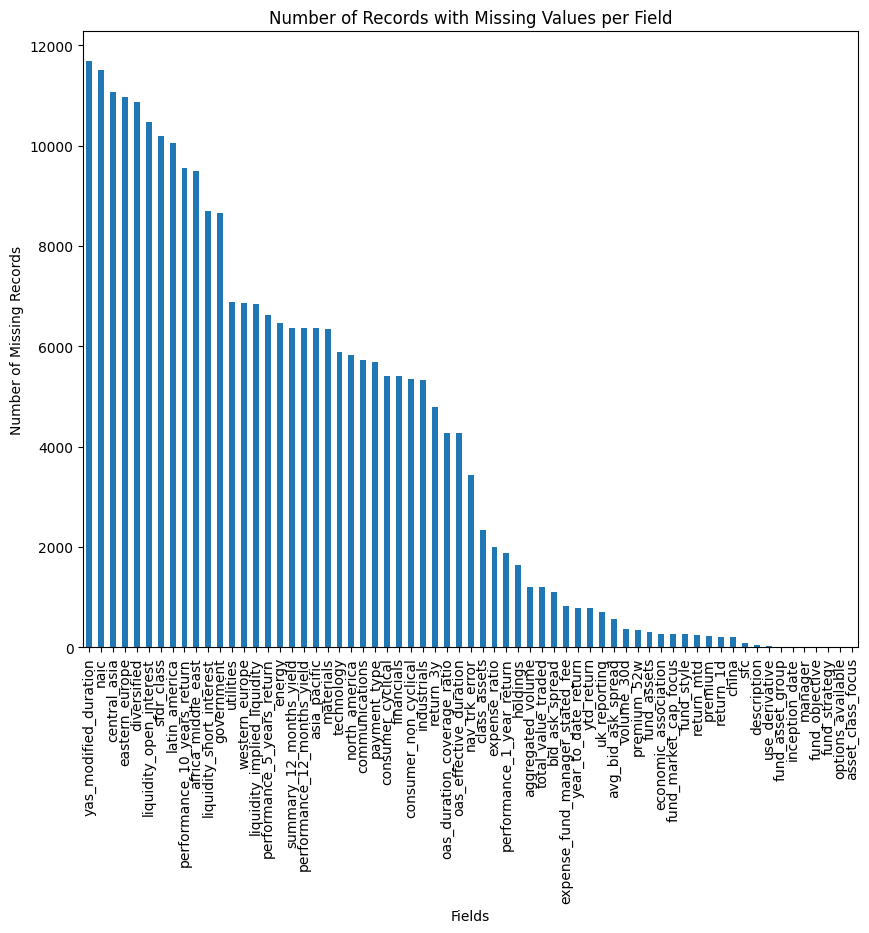

In [15]:
df.replace(["Not Available", "nan", None], np.nan, inplace=True)

missing_values_count = df.isnull().sum()

# Filter fields with missing values
fields_with_missing_values = missing_values_count[missing_values_count > 0]

# Sort fields by number of missing values in descending order
sorted_fields = fields_with_missing_values.sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 8))
sorted_fields.plot(kind='bar')
plt.title('Number of Records with Missing Values per Field')
plt.xlabel('Fields')
plt.ylabel('Number of Missing Records')
plt.xticks(rotation=90)
plt.show()

In [17]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the columns by the percentage of missing values in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Set display option to not truncate the output
pd.set_option('display.max_rows', None)

# Print the sorted percentages without truncation
print(sorted_missing_percentage)


yas_modified_duration              95.664267
naic                               94.077225
central_asia                       90.518652
eastern_europe                     89.806937
diversified                        88.857984
liquidity_open_interest            85.700262
sfdr_class                         83.393325
latin_america                      82.256217
performance_10_years_return        78.165903
africa_middle_east                 77.707788
liquidity_short_interest           71.114202
government                         70.868783
utilities                          56.380890
western_europe                     56.086387
liquidity_implied_liquidity        55.930955
performance_5_years_return         54.180301
energy                             52.830497
performance_12_months_yield        52.094241
summary_12_months_yield            52.094241
asia_pacific                       52.069699
materials                          51.971531
technology                         48.142997
north_amer

In [18]:
fields_to_remove = [
    'yas_modified_duration',
    'naic',
    'central_asia',
    'eastern_europe',
    'diversified',
    'liquidity_open_interest',
    'sfdr_class',
    'latin_america',
    'performance_10_years_return',
    'africa_middle_east',
    'liquidity_short_interest',
    'government'
]

# Remove the specified fields from the DataFrame
df.drop(columns=fields_to_remove, inplace=True)

# Display the updated DataFrame
print(df.head())


  ticker     bbg_ticker                         etf_name  \
0    SPY  SPY US Equity           SPDR S&P 500 ETF Trust   
1    IVV  IVV US Equity         iShares Core S&P 500 ETF   
2    VOO  VOO US Equity             Vanguard S&P 500 ETF   
3    VTI  VTI US Equity  Vanguard Total Stock Market ETF   
4    QQQ  QQQ US Equity       Invesco QQQ Trust Series 1   

                                         description fund_type  \
0  SPDR S&P 500 ETF Trust is an exchange-traded f...       ETF   
1  iShares Core S&P 500 ETF is an exchange-traded...       ETF   
2  Vanguard S&P 500 ETF is an exchange-traded fun...       ETF   
3  Vanguard Total Stock Market ETF is an exchange...       ETF   
4  Invesco QQQ Trust Series 1 is an exchange-trad...       ETF   

                  manager asset_class_focus fund_asset_group  \
0       State Street Corp            Equity  Domestic Equity   
1           BlackRock Inc            Equity  Domestic Equity   
2  Vanguard Group Inc/The            Equity  Domes

In [20]:
import pandas as pd
import numpy as np

# Replace "Not Available", "nan", and null values with np.nan
df.replace(["Not Available", "nan", None], np.nan, inplace=True)

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the columns by the percentage of missing values in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the top records by missing fields in descending order with percentage
top_missing_fields = sorted_missing_percentage[sorted_missing_percentage > 0]

# Create a scrollable display
from IPython.display import display, HTML

html = top_missing_fields.to_frame().to_html()
display(HTML(f'<div style="max-height: 300px; overflow-y: scroll;">{html}</div>'))


,0
utilities,56.380890
western_europe,56.086387
liquidity_implied_liquidity,55.930955
performance_5_years_return,54.180301
energy,52.830497
performance_12_months_yield,52.094241
summary_12_months_yield,52.094241
asia_pacific,52.069699
materials,51.971531
technology,48.142997


70

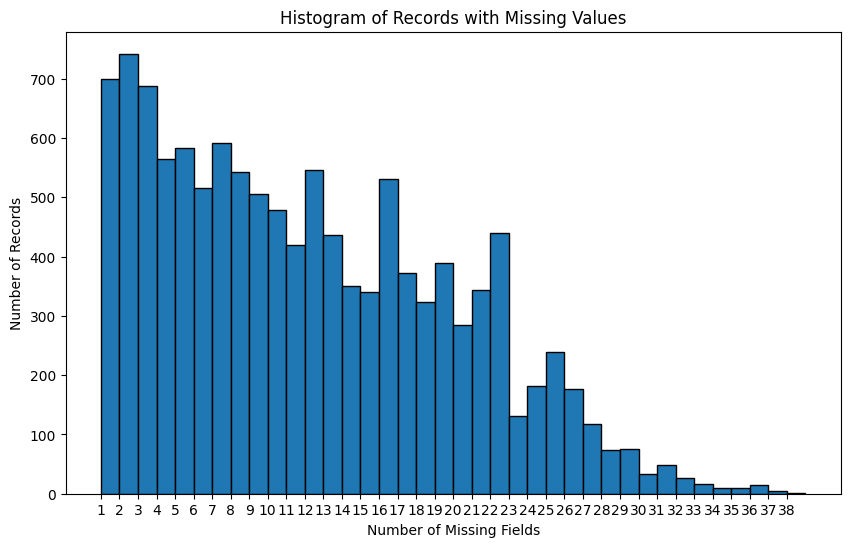

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# First, calculate the number of missing values per row
missing_counts = df.isnull().sum(axis=1)

# Filter records that have at least one missing value
missing_counts = missing_counts[missing_counts > 0]

# Sort the counts in descending order
missing_counts_sorted = missing_counts.sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(missing_counts_sorted, bins=range(1, missing_counts_sorted.max() + 2), edgecolor='black')
plt.xlabel('Number of Missing Fields')
plt.ylabel('Number of Records')
plt.title('Histogram of Records with Missing Values')
plt.xticks(range(1, missing_counts_sorted.max() + 1))
plt.show()


In [30]:
missing_counts = df.isnull().sum(axis=1)

# Filter records that have more than 22 missing fields
records_missing = missing_counts[missing_counts > 26]

# Get the number of such records
num_records_missing = records_missing.shape[0]

print(f"Number of records missing more than 26 fields: {num_records_missing}")


Number of records missing more than 26 fields: 430


In [33]:
len(df)

12224

In [36]:
missing_counts = df.isnull().sum(axis=1)

# Filter records that have more than 22 missing fields
records_to_remove = missing_counts[missing_counts > 26].index

# Remove these records from the DataFrame
df_cleaned = df.drop(records_to_remove)

In [37]:
len(df_cleaned)

11794

In [39]:
# Define the path
CLEAN_PATH = "../../data/etf_data_v3_clean.json"

# Save the cleaned DataFrame to a JSON file
df_cleaned.to_json(CLEAN_PATH, orient='records', indent=4)

print(f"Cleaned DataFrame saved to {CLEAN_PATH}")

Cleaned DataFrame saved to ../../data/etf_data_v3_clean.json


________

In [8]:
def analyze_missing_values(df):
    df.replace("Not Available", np.nan, inplace=True)
    total_records = len(df)
    
    # Calculate missing values for each field
    missing_by_field_df = df.isna().sum().sort_values(ascending=False)
    # missing_by_field_percentage = (missing_by_field / total_records) * 100
    
    # missing_by_field_df = pd.DataFrame({
    #     'Not Available Values': missing_by_field,
    #     'Percentage': missing_by_field_percentage
    # })
    
    # Calculate missing values for each row
    missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
    
    return missing_by_field_df, missing_by_row

# Load data
df = load_data(ETFS_PATH_V3)

# Analyze missing values
missing_by_field_df, missing_by_row_df = analyze_missing_values(df)

# Print Not Available values by field with percentage
print("Not Available values by field:")
print(missing_by_field_df)

print("Not Available values by row:")
print(missing_by_row_df)


Not Available values by field:
yas_modified_duration    11694
naic                     11500
central_asia             11065
eastern_europe           10978
diversified              10862
                         ...  
manager                      0
structure                    0
index_weight                 0
tax_form                     0
ticker                       0
Length: 82, dtype: int64
Not Available values by row:
12050    50
11104    50
12219    49
11971    49
11844    48
         ..
214       3
5925      2
89        2
33        2
443       2
Length: 12224, dtype: int64


Not Available values by field:
yas_modified_duration    11694
naic                     11500
central_asia             11065
eastern_europe           10978
diversified              10862
                         ...  
manager                      0
structure                    0
index_weight                 0
tax_form                     0
ticker                       0
Length: 82, dtype: int64
Not Available values by row:
12050    50
11104    50
12219    49
11971    49
11844    48
         ..
214       3
5925      2
89        2
33        2
443       2
Length: 12224, dtype: int64


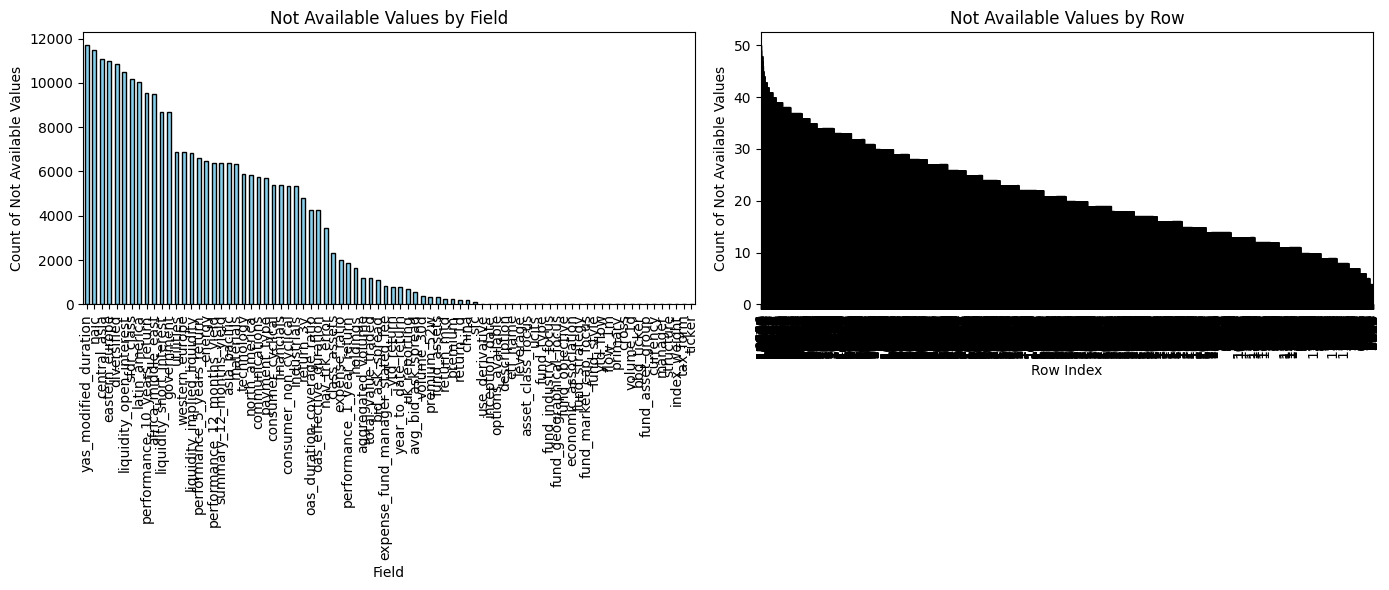

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming missing_by_field_df and missing_by_row_df are defined

# Print the DataFrames
print("Not Available values by field:")
print(missing_by_field_df)

print("Not Available values by row:")
print(missing_by_row_df)

# Create histograms
plt.figure(figsize=(14, 6))

# Histogram for Not Available values by field
plt.subplot(1, 2, 1)
missing_by_field_df.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')
plt.title('Not Available Values by Field')
plt.xlabel('Field')
plt.ylabel('Count of Not Available Values')
plt.xticks(rotation=90)

# Histogram for Not Available values by row
plt.subplot(1, 2, 2)
missing_by_row_df.plot(kind='bar', legend=False, color='salmon', edgecolor='black')
plt.title('Not Available Values by Row')
plt.xlabel('Row Index')
plt.ylabel('Count of Not Available Values')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
def remove_fields_with_missing_values(df, F):
    """
    Removes fields (columns) that have missing values for F% of the rows or more.
    
    :param df: pandas DataFrame
    :param F: float, threshold percentage (0.0 to 1.0)
    :return: pandas DataFrame with specified fields removed
    """
    threshold = F * len(df)
    df = df.loc[:, df.isna().sum() < threshold]
    return df

def remove_records_with_missing_values(df, R):
    """
    Removes records (rows) that have R% of the fields missing or more.
    
    :param df: pandas DataFrame
    :param R: float, threshold percentage (0.0 to 1.0)
    :return: pandas DataFrame with specified records removed
    """
    threshold = R * df.shape[1]
    df = df[df.isna().sum(axis=1) < threshold]
    return df

# Example usage:
df_cleaned = remove_records_with_missing_values(df, 0.5)  # Remove rows with 50% or more missing values
missing_by_field_df, missing_by_row = analyze_missing_values(df)

# Print Not Available values by field with percentage
print("Not Available values by field with percentage:")
print(missing_by_field_df)


In [12]:
import matplotlib.pyplot as plt

def plot_missing_values_histogram(missing_by_row):
    plt.figure(figsize=(10, 6))
    plt.hist(missing_by_row, bins=range(0, 87), edgecolor='black')
    plt.title('Histogram of Not Available Values per number of unavail fields')
    plt.xlabel('Number of Not Available Values')
    plt.ylabel('Number of Records')
    plt.xticks(range(0, 87))
    plt.show()

# Plot the histogram
plot_missing_values_histogram(missing_by_field)


NameError: name 'missing_by_field' is not defined

In [13]:
# Remove specified fields
fields_to_remove = ['figi', 'domicile', 'total_return_1y', 'tot_ret_ytd', 'open_interest', 'return_10y']
df.drop(columns=fields_to_remove, inplace=True)

# Verify the removal
print(f"Columns after removal: {df.columns}")

Columns after removal: Index(['etf_name', 'ticker', 'bbg_ticker', 'description', 'fund_type',
       'manager', 'asset_class_focus', 'fund_asset_group',
       'fund_industry_focus', 'fund_geographical_focus', 'fund_objective',
       'economic_association', 'fund_strategy', 'fund_market_cap_focus',
       'fund_style', 'class_assets', 'fund_assets', 'expense_ratio',
       'year_to_date_return', 'yield_12m', 'volume_30d', 'ytd_flow', 'flow_1m',
       'nav_trk_error', 'holdings', 'primary', 'return_1d', 'return_mtd',
       'ytd_return', 'return_3y', 'return_5y', 'volume_1d',
       'aggregated_volume', 'aggregated_value_traded', 'short_interest',
       'total_value_traded', 'bid_ask_spread', 'implied_liquidity',
       'inception_date', 'inception_year', 'use_derivative', 'payment_type',
       'leverage', 'structure', 'avg_bid_ask_spread'],
      dtype='object')


In [23]:
fields_to_remove = [
    'figi', 'domicile', 'total_return_1y', 'tot_ret_ytd',
    'short_interest', 'implied_liquidity', 'return_5y', 'yield_12m'
]
df.drop(columns=fields_to_remove, inplace=True)


In [32]:
def analyze_missing_values(df):
    df.replace("Not Available", np.nan, inplace=True)
    df.replace("nan", np.nan, inplace=True)
    total_records = len(df)
    
    # Calculate missing values for each field
    missing_by_field = df.isna().sum().sort_values(ascending=False)
    missing_by_field_percentage = (missing_by_field / total_records) * 100
    
    missing_by_field_df = pd.DataFrame({
        'Not Available Values / nan': missing_by_field,
        'Percentage': missing_by_field_percentage
    })
    
    # Calculate missing values for each row
    missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
    
    return missing_by_field_df, missing_by_row


In [38]:
missing_by_field, missing_by_row = analyze_missing_values(df)

# Print missing values
print("Missing values by field:")
print(missing_by_field)

print("\nMissing values by row:")
print(missing_by_row)


Missing values by field:
                         Not Available Values / nan  Percentage
payment_type                                   5692   46.564136
return_3y                                      4782   39.119764
nav_trk_error                                  3427   28.035013
class_assets                                   2330   19.060864
expense_ratio                                  1997   16.336715
holdings                                       1634   13.367147
aggregated_volume                              1206    9.865838
aggregated_value_traded                        1205    9.857657
total_value_traded                             1205    9.857657
bid_ask_spread                                 1106    9.047775
ytd_return                                      790    6.462696
year_to_date_return                             790    6.462696
avg_bid_ask_spread                              569    4.654777
volume_30d                                      357    2.920484
fund_assets    

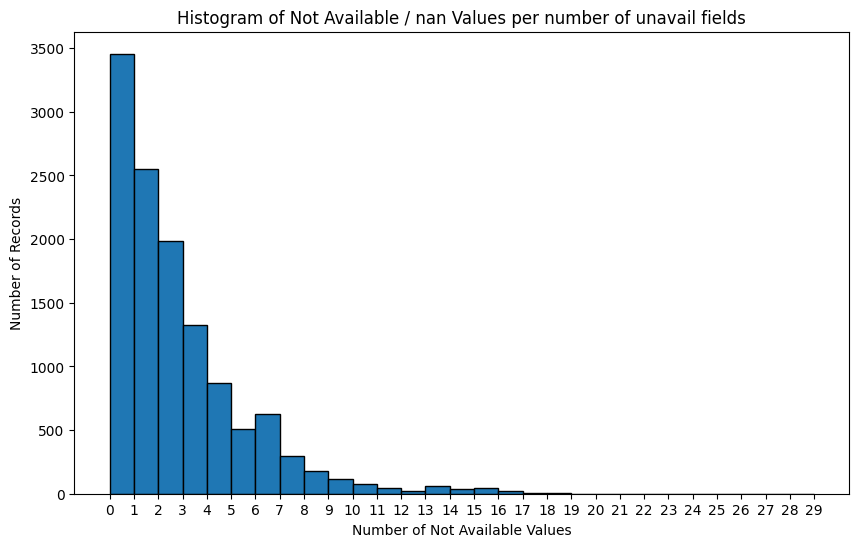

In [37]:
import matplotlib.pyplot as plt

def plot_missing_values_histogram(missing_by_row):
    plt.figure(figsize=(10, 6))
    plt.hist(missing_by_row, bins=range(0, 30), edgecolor='black')
    plt.title('Histogram of Not Available / nan Values per number of unavail fields')
    plt.xlabel('Number of Not Available Values')
    plt.ylabel('Number of Records')
    plt.xticks(range(0, 30))
    plt.show()

# Plot the histogram
plot_missing_values_histogram(missing_by_row)


In [45]:
(missing_by_row > 12).sum()


174

In [46]:
df_cleaned = df[missing_by_row <= 12]


/tmp/ipykernel_94828/3659929268.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[missing_by_row <= 12]


In [49]:
# Print confirmation
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_cleaned)}")


Rows before cleaning: 12224
Rows after cleaning: 12050


In [54]:
d1 =     {
        "etf_name":"SPDR S&P 500 ETF Trust",
        "ticker":"SPY",
        "bbg_ticker":"SPY US Equity",
        "description":"SPDR S&P 500 ETF Trust is an exchange-traded fund incorporated in the USA. The ETF tracks the S&P 500 Index. The Trust consists of a portfolio representing all 500 stocks in the S&P 500 Index. It holds predominantly large-cap U.S. stocks. This ETF is structured as a Unit Investment Trust and pays dividends on a quarterly basis. The holdings are weighted by market capitalization.",
        "fund_type":"ETF",
        "manager":"State Street Corp",
        "asset_class_focus":"Equity",
        "fund_asset_group":"Domestic Equity",
        "fund_industry_focus":"N.A.",
        "fund_geographical_focus":"United States",
        "fund_objective":"Large-cap",
        "economic_association":"N.A.",
        "fund_strategy":"Blend",
        "fund_market_cap_focus":"Large-cap",
        "fund_style":"N.A.",
        "class_assets":"514613.75",
        "fund_assets":"514613.75",
        "expense_ratio":"0.09%",
        "year_to_date_return":"+9.92%",
        "volume_30d":"68217120",
        "ytd_flow":"-24543.06",
        "flow_1m":"-7267.63",
        "nav_trk_error":"0.0224%",
        "holdings":"504.0",
        "primary":"primary",
        "return_1d":"+0.13%",
        "return_mtd":"+3.76%",
        "ytd_return":"+9.92%",
        "return_3y":"+9.21%",
        "volume_1d":"52233171",
        "aggregated_volume":"52326300",
        "aggregated_value_traded":"27254010699",
        "total_value_traded":"27254010699",
        "bid_ask_spread":"0.01",
        "inception_date":"01/22/93",
        "inception_year":"93",
        "use_derivative":"No",
        "payment_type":"Income",
        "leverage":"does not use leverage",
        "structure":"Unit Investment Trust (UIT)",
        "avg_bid_ask_spread":"0.00%"
    }
d2 =     {
        "etf_name": "YLETF 4D Nasdaq 100",
        "ticker": "YELNF3",
        "bbg_ticker": "YELNF3 IT Equity",
        "figi": "nan",
        "description": "YLETF 4D Nasdaq 100 Fund is an Exchange-Traded Fund incorporated in Israel. The Fund seeks to track the performance of the NASDAQ 100 - NTR index.",
        "fund_type": "ETF",
        "domicile": "nan",
        "manager": "Yelin Lapidot Holdings Managem",
        "asset_class_focus": "Equity",
        "fund_asset_group": "Global Equity",
        "fund_industry_focus": "N.A.",
        "fund_geographical_focus": "United States",
        "fund_objective": "N.A.",
        "economic_association": "N.A.",
        "fund_strategy": "Blend",
        "fund_market_cap_focus": "Large-cap",
        "fund_style": "N.A.",
        "tot_ret_ytd": "nan",
        "total_return_1y": "nan",
        "class_assets": "Not Available",
        "fund_assets": "8.13",
        "expense_ratio": "0.02%",
        "year_to_date_return": "Not Available",
        "yield_12m": "Not Available",
        "volume_30d": "5649",
        "ytd_flow": "5.64",
        "flow_1m": "0.01",
        "nav_trk_error": "Not Available",
        "holdings": "24.0",
        "primary": "primary",
        "return_1d": "0%",
        "return_mtd": "+0.65%",
        "ytd_return": "Not Available",
        "return_3y": "Not Available",
        "return_5y": "Not Available",
        "return_10y": "Not Available",
        "volume_1d": "0",
        "aggregated_volume": "Not Available",
        "aggregated_value_traded": "Not Available",
        "short_interest": "Not Available",
        "open_interest": "Not Available",
        "total_value_traded": "Not Available",
        "bid_ask_spread": "21",
        "implied_liquidity": "Not Available",
        "inception_date": "01/15/24",
        "inception_year": "24",
        "use_derivative": "No",
        "payment_type": "Income",
        "leverage": "does not use leverage",
        "structure": "Open-End Investment Company",
        "avg_bid_ask_spread": "0.36%"
    }

In [61]:
deleted = set(d1) ^ set(d2)
deleted

{'domicile',
 'figi',
 'implied_liquidity',
 'open_interest',
 'return_10y',
 'return_5y',
 'short_interest',
 'tot_ret_ytd',
 'total_return_1y',
 'yield_12m'}

In [70]:
def clean_strings(df):
    # Iterate over each column in the DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        # Replace backslashes
        df[col] = df[col].str.replace(r'\\', '', regex=True)
        # Replace escaped forward slashes
        df[col] = df[col].str.replace(r'\/', '/', regex=True)
        # Replace escaped double quotes
        df[col] = df[col].str.replace(r'\"', '"', regex=True)
    return df


In [71]:
cleaned_df = clean_strings(df_cleaned)

/tmp/ipykernel_94828/3836148336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\\', '', regex=True)
/tmp/ipykernel_94828/3836148336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\/', '/', regex=True)
/tmp/ipykernel_94828/3836148336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [86]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
df = cleaned_df

# List of fields to check
fields_to_check = [
    'avg_bid_ask_spread', 'bid_ask_spread', 'expense_ratio', 
    'nav_trk_error', 'return_3y', 'return_mtd', 
    'ytd_return'
]

# Function to check and append '%' if necessary
def append_percentage(value):
    if isinstance(value, str) and value.replace('.', '', 1).isdigit() and not value.endswith('%'):
        return value + '%'
    return value

# Apply the function to each field in each row
for field in fields_to_check:
    df[field] = df[field].apply(append_percentage)

# Print the updated DataFrame
print(df)


                                  etf_name   ticker         bbg_ticker  \
0                   SPDR S&P 500 ETF Trust      SPY      SPY US Equity   
1                 iShares Core S&P 500 ETF      IVV      IVV US Equity   
2                     Vanguard S&P 500 ETF      VOO      VOO US Equity   
3          Vanguard Total Stock Market ETF      VTI      VTI US Equity   
4               Invesco QQQ Trust Series 1      QQQ      QQQ US Equity   
...                                    ...      ...                ...   
12218  YLETF 4A Nasdaq 100 Currency Hedged   YELNF4   YELNF4 IT Equity   
12220              Amplify High Income ETF      YYY      YYY US Equity   
12221                   BMO All Equity ETF     ZEQT     ZEQT CN Equity   
12222                     Zerodha Gold Etf  ZGLDETF  ZGLDETF IN Equity   
12223     Zerodha Nifty 1D Rate Liquid ETF  ZN1RLET  ZN1RLET IN Equity   

                                             description fund_type  \
0      SPDR S&P 500 ETF Trust is an excha

/tmp/ipykernel_94828/1867005272.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field] = df[field].apply(append_percentage)


In [84]:
import os
a
# Relative path to the file
CLEANED_ETFS_PATH = "../../data/etf_data_cleaned_v3.json"

# Get the full absolute path
full_path = os.path.abspath(CLEANED_ETFS_PATH)

print(full_path)


/home/bunt/FolioLLM/data/etf_data_cleaned_v3.json
